In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('Individual or Pair Sports (Physical).csv')

In [5]:
df1.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category
0,1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Individual or Pair Sports (Physical)
1,4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Individual or Pair Sports (Physical)
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",Individual or Pair Sports (Physical)
3,6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,Individual or Pair Sports (Physical)
4,7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",Individual or Pair Sports (Physical)


In [6]:
df1.drop(columns ='Unnamed: 0',axis =1,inplace = True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146128 entries, 0 to 146127
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      146128 non-null  object 
 1   Sex       146128 non-null  object 
 2   Age       146128 non-null  float64
 3   Height    146128 non-null  float64
 4   Weight    146128 non-null  float64
 5   Team      146128 non-null  object 
 6   NOC       146128 non-null  object 
 7   Year      146128 non-null  int64  
 8   Season    146128 non-null  object 
 9   City      146128 non-null  object 
 10  Sport     146128 non-null  object 
 11  Event     146128 non-null  object 
 12  category  146128 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 14.5+ MB


In [8]:
df1.corr(numeric_only = True)

,Age,Height,Weight,Year
Age,1.000000,0.196875,0.201382,0.028214
Height,0.196875,1.000000,0.769382,-0.132078
Weight,0.201382,0.769382,1.000000,-0.185051
Year,0.028214,-0.132078,-0.185051,1.000000


<Axes: >

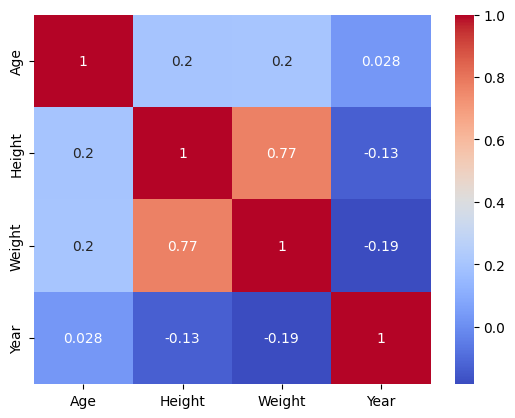

In [9]:
sns.heatmap(df1.corr(numeric_only = True),cmap = 'coolwarm',annot= True)

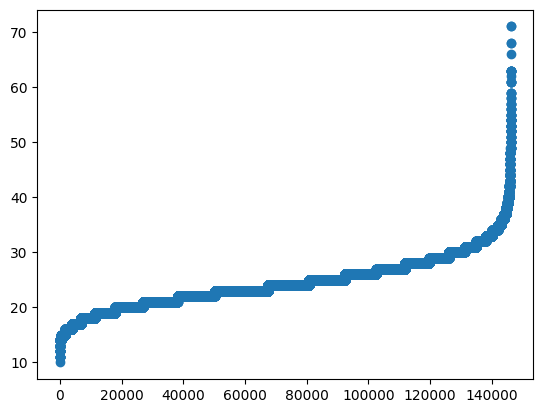

In [10]:
d = df1.sort_values(by = 'Age')
plt.scatter(range(len(d)),'Age',data = d)


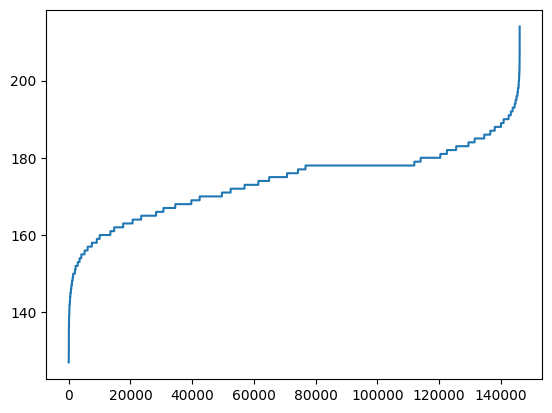

In [11]:
d = df1.sort_values(by = 'Height')
plt.plot(range(len(d)),'Height',data = d)

In [12]:
df1.describe()

,Age,Height,Weight,Year
count,146128.000000,146128.000000,146128.000000,146128.000000
mean,24.513050,173.834624,70.074452,1979.136100
std,4.708359,9.223876,13.671985,29.156859
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,176.000000,70.000000,1988.000000
75%,27.000000,178.000000,78.000000,2002.000000
max,71.000000,214.000000,214.000000,2016.000000


# i have check the skewness and correlation,check the oulier in the data.i have see some oulier in the data.so i have remove the oulier in the data

In [13]:
q1 = np.percentile(df1['Age'],25)
q3 = np.percentile(df1['Age'],75)
iqr = q3 - q1
upper_limit_age = q3 + 1.5*iqr
lower_limit_age = q1 - 1.5*iqr
print('upper ',upper_limit_age)
print('lower',lower_limit_age)

upper  36.0
lower 12.0


In [14]:
q1 = np.percentile(df1['Height'],25)
q3 = np.percentile(df1['Height'],75)
iqr = q3 - q1
upper_limit_hg = q3 + 1.5*iqr
lower_limit_hg = q1 - 1.5*iqr
print('upper ',upper_limit_hg)
print('lower',lower_limit_hg)

upper  193.0
lower 153.0


In [15]:
q1 = np.percentile(df1['Weight'],25)
q3 = np.percentile(df1['Weight'],75)
iqr = q3 - q1
upper_limit_wg = q3 + 1.5*iqr
lower_limit_wg = q1 - 1.5*iqr
print('upper ',upper_limit_wg)
print('lower',lower_limit_wg)

upper  105.0
lower 33.0


In [16]:
q1 = np.percentile(df1['Year'],25)
q3 = np.percentile(df1['Year'],75)
iqr = q3 - q1
upper_limit_yr = q3 + 1.5*iqr
lower_limit_yr = q1 - 1.5*iqr
print('upper ',upper_limit_yr)
print('lower',lower_limit_yr)

upper  2065.0
lower 1897.0


In [17]:
# this new data base create.i have remove all outlier in this dataset
df = df1[(df1['Age'] > lower_limit_age) & (df1['Age'] < upper_limit_age) & (df1['Height'] > lower_limit_hg) & (df1['Height'] < upper_limit_hg) & (df1['Year'] > lower_limit_yr) & (df1['Weight'] > lower_limit_wg) & (df1['Weight'] < upper_limit_wg)] 


In [18]:
df.describe()

,Age,Height,Weight,Year
count,135175.000000,135175.000000,135175.000000,135175.000000
mean,24.286813,173.928996,69.502952,1978.665537
std,4.129634,7.991128,11.048067,29.103536
min,13.000000,154.000000,36.000000,1900.000000
25%,21.000000,168.000000,61.000000,1960.000000
50%,24.000000,176.000000,70.000000,1988.000000
75%,27.000000,178.000000,78.000000,2002.000000
max,35.000000,192.000000,104.500000,2016.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\3983742443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\3983742443.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

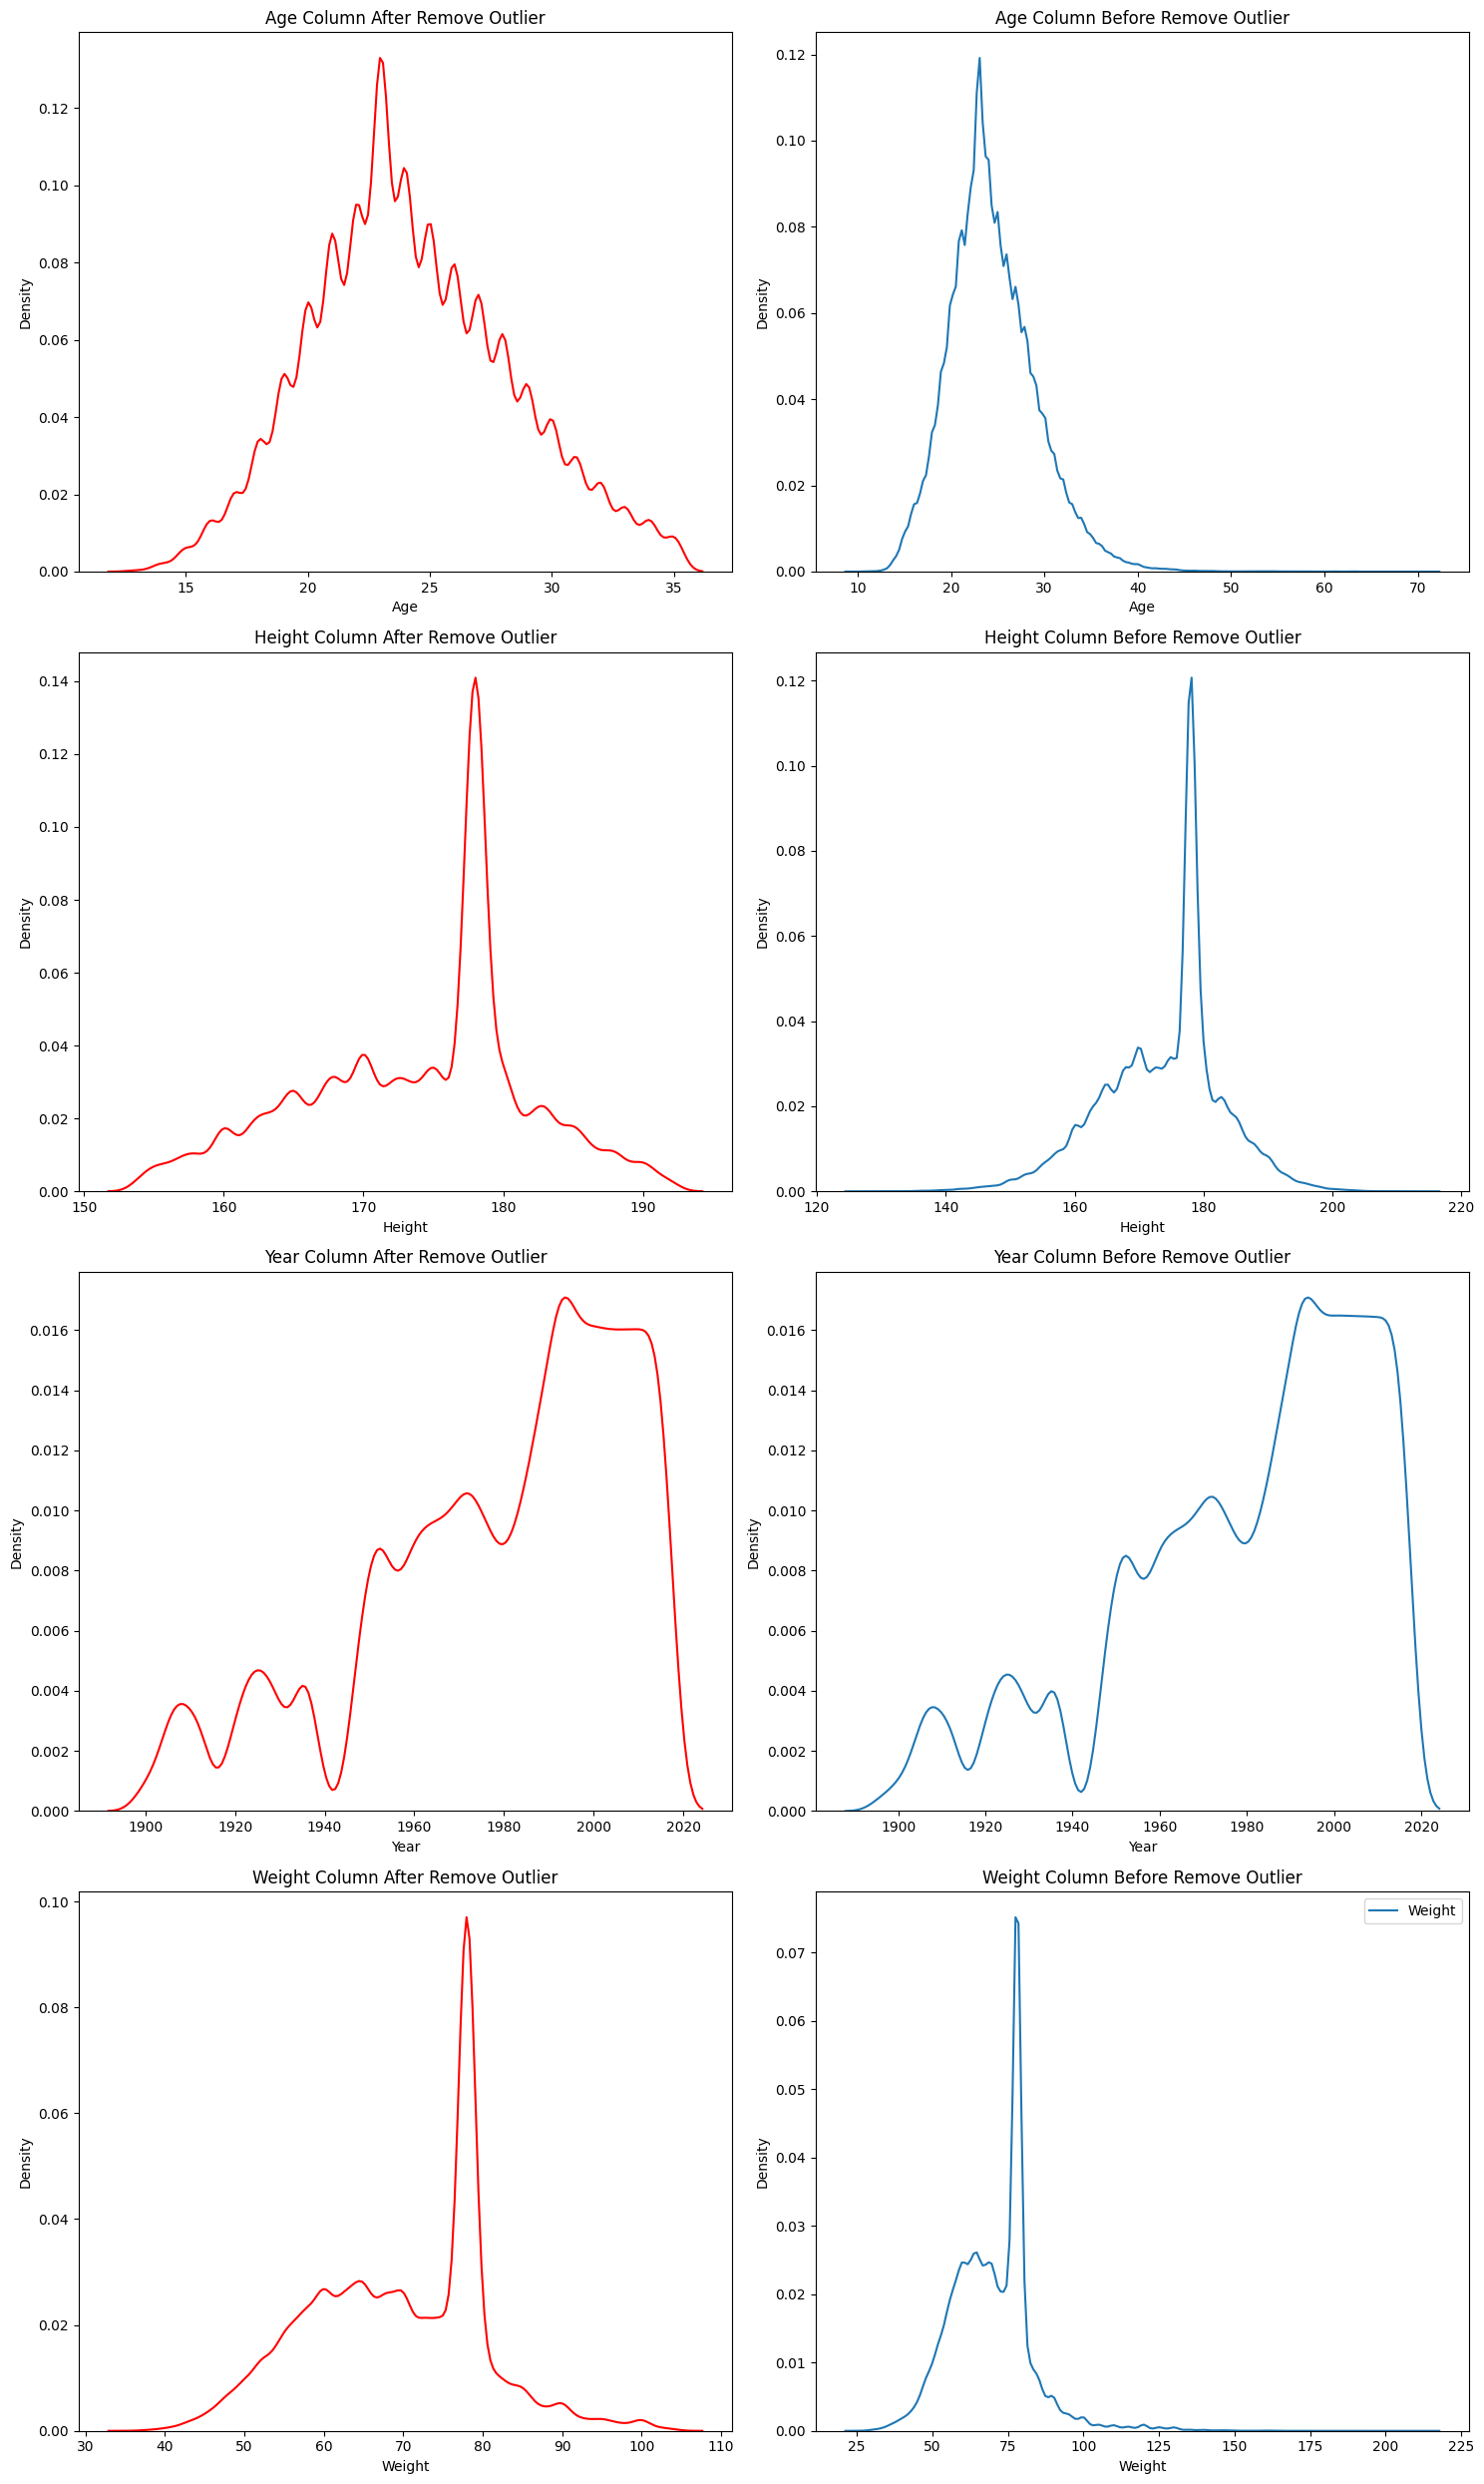

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.distplot(df1['Age'], hist=False, label='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.distplot(df['Height'], hist=False, label='Height', ax=axes[1, 0],color = 'red')
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.distplot(df1['Height'], hist=False, label='Height', ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.distplot(df['Year'], hist=False, label='Year', ax=axes[2, 0],color = 'red')
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.distplot(df1['Year'], hist=False, label='year', ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.distplot(df['Weight'], hist=False, label='weight',color = 'red', ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.distplot(df1['Weight'], hist=False, label='Weight', ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


In [20]:
y1 = df['Year'].skew()
h1 = df['Height'].skew()
w1 = df['Weight'].skew()
a1 = df['Age'].skew()
y = df1['Year'].skew()
h = df1['Height'].skew()
w = df1['Weight'].skew()
a = df1['Age'].skew()
print(f'After remove outlier Year skewness:{y1} and Before remove outlier skewness:{y}')
print(f'After remove outlier Height skewness:{h1} and Before remove outlier skewness:{h}')
print(f'After remove outlier Weight skewness:{w1} and Before remove outlier skewness:{w}')
print(f'After remove outlier Age skewness:{a1} and Before remove outlier skewness:{a}')



After remove outlier Year skewness:-0.811023751576901 and Before remove outlier skewness:-0.8509659112938814
After remove outlier Height skewness:-0.34729585836938953 and Before remove outlier skewness:-0.43966493877875484
After remove outlier Weight skewness:-0.08571036376856489 and Before remove outlier skewness:0.8344651534835291
After remove outlier Age skewness:0.2927539851426043 and Before remove outlier skewness:0.7920250928602022


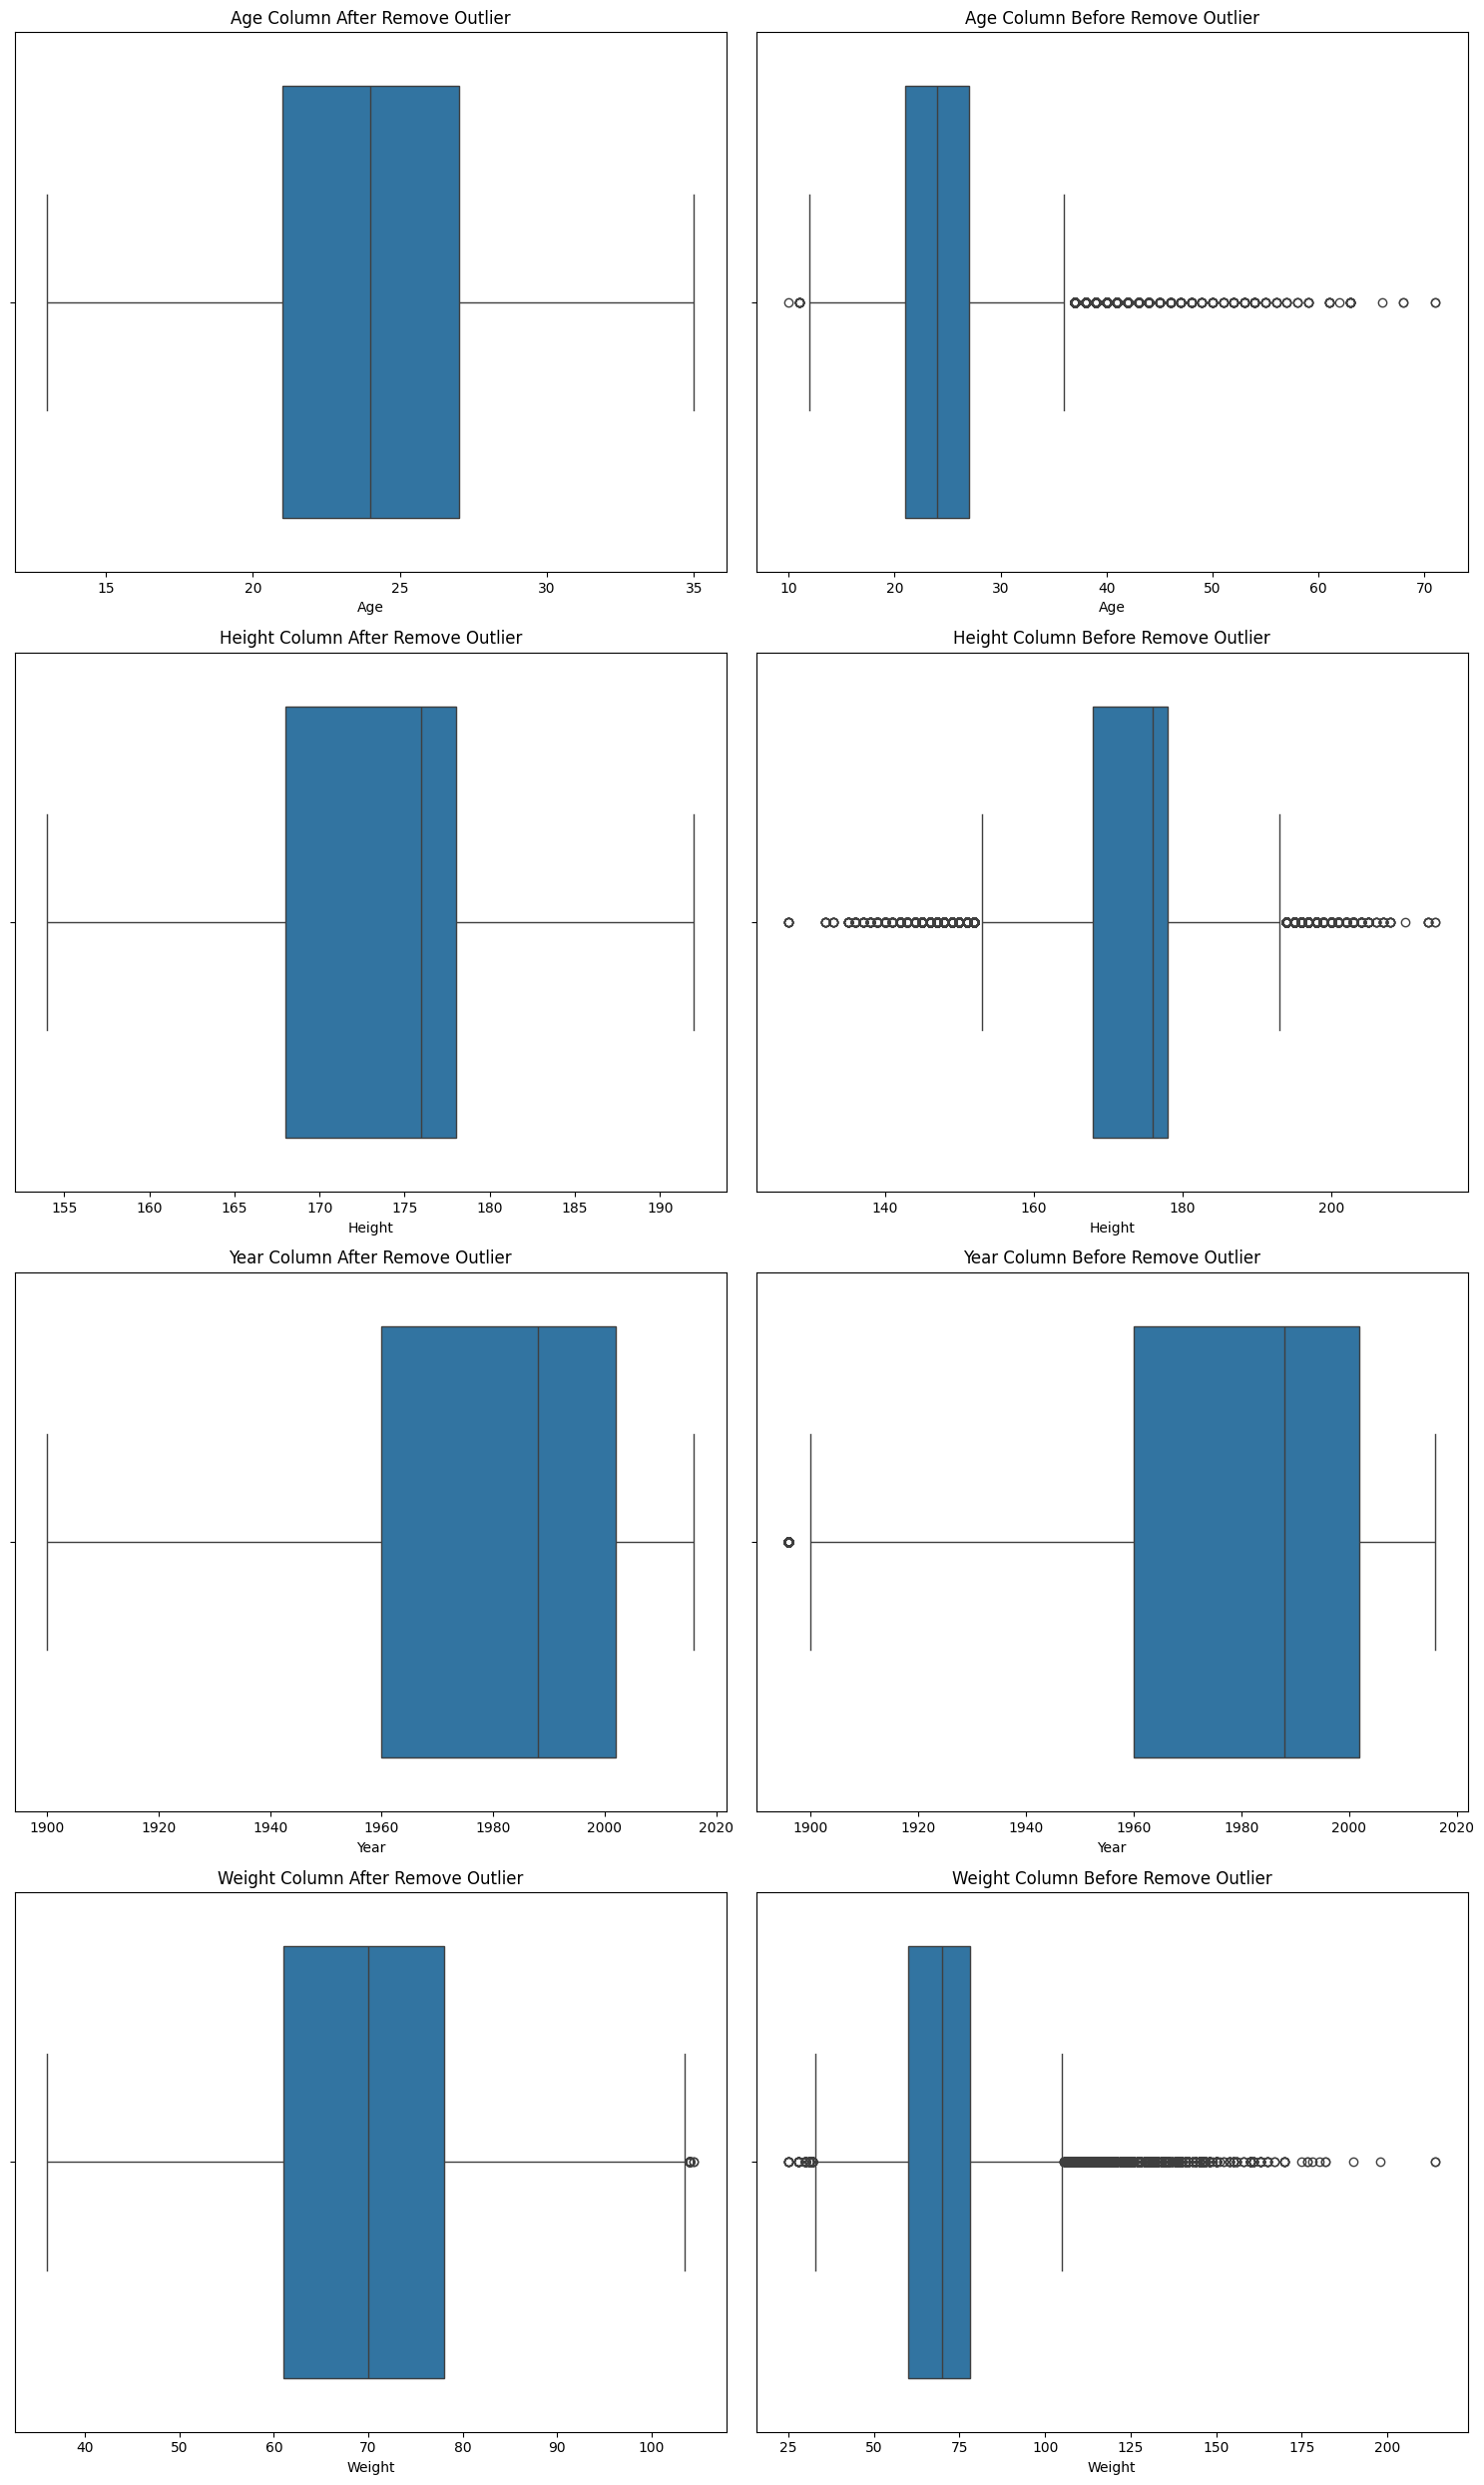

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.boxplot(x = df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.boxplot(x = df1['Age'],ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.boxplot(x = df['Height'], ax=axes[1, 0])
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.boxplot(x = df1['Height'],ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.boxplot(x = df['Year'] ,ax=axes[2, 0])
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.boxplot(x = df1['Year'], ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.boxplot(x = df['Weight'], ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.boxplot(x = df1['Weight'], ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\1638793607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\1638793607.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))


Text(0.5, 1.0, 'Sex Ratio According to Dataset')

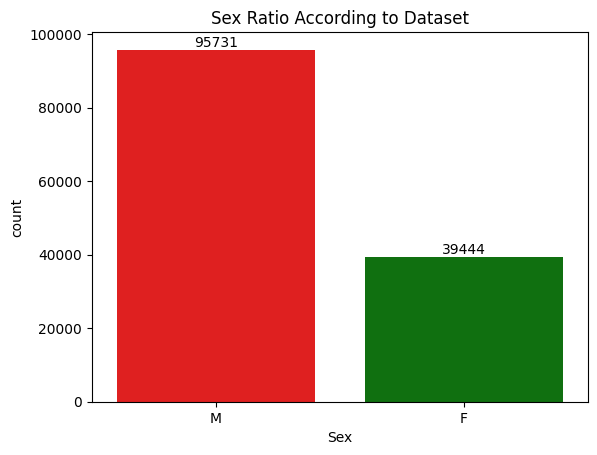

In [22]:
ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
plt.title('Sex Ratio According to Dataset')

In [23]:
def age_c(data):
    if 10<= data <=20:
        return '10-20'
    elif 21<= data <=30:
        return '21-30'
    elif 31<= data <=40:
        return '31 - 40'
df['Age_Group'] = df['Age'].apply(age_c)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\450057113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(age_c)


In [24]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category,Age_Group
0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Individual or Pair Sports (Physical),21-30
1,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Individual or Pair Sports (Physical),21-30
2,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",Individual or Pair Sports (Physical),21-30
3,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,Individual or Pair Sports (Physical),21-30
4,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",Individual or Pair Sports (Physical),21-30


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\2836699870.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['10-20','21-30','31-40'])


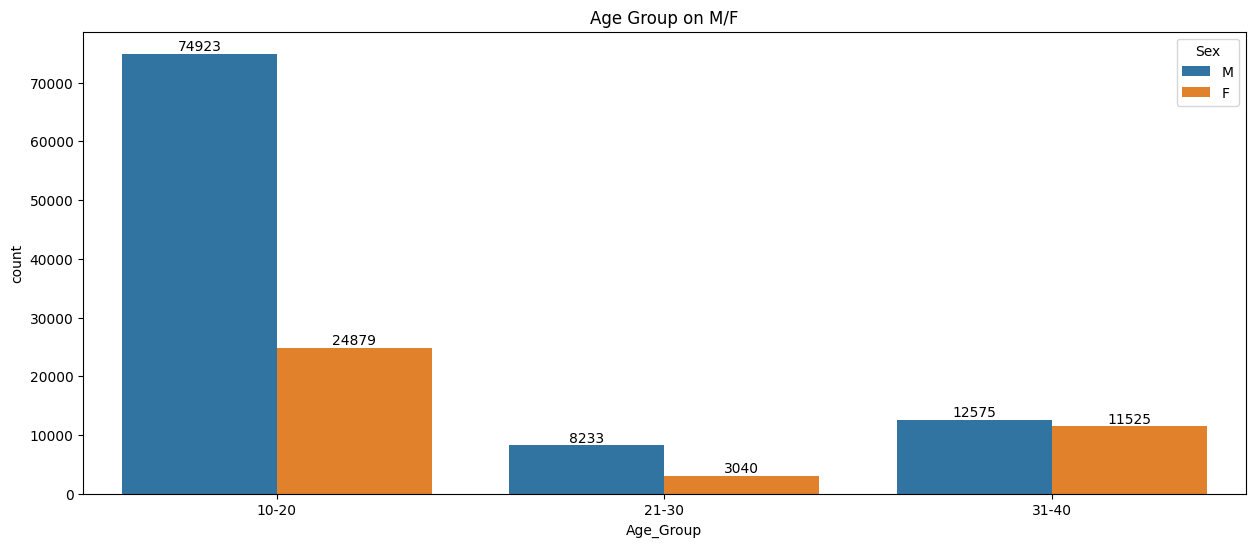

In [25]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = df['Age_Group'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_xticklabels(labels = ['10-20','21-30','31-40'])
plt.title('Age Group on M/F')
plt.show()

In [26]:
l = df['Sport'].unique()

l

array(['Judo', 'Speed Skating', 'Cross Country Skiing', 'Athletics',
       'Badminton', 'Gymnastics', 'Alpine Skiing', 'Wrestling', 'Luge',
       'Taekwondo', 'Cycling', 'Weightlifting', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Figure Skating', 'Table Tennis',
       'Nordic Combined', 'Archery', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Trampolining', 'Triathlon', 'Ski Jumping',
       'Short Track Speed Skating', 'Skeleton', 'Racquets', 'Cricket'],
      dtype=object)

In [29]:
# male_d = df[(df['Sex'] == 'M')]
age_mean = round(df.groupby(['Sport','Sex'])['Age'].mean()).reset_index()
age_mean

,Sport,Sex,Age
0,Alpine Skiing,F,22.0
1,Alpine Skiing,M,24.0
2,Archery,F,24.0
3,Archery,M,25.0
4,Athletics,F,25.0
5,Athletics,M,25.0
6,Badminton,F,25.0
7,Badminton,M,26.0
8,Canoeing,F,25.0
9,Canoeing,M,25.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\808566180.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees


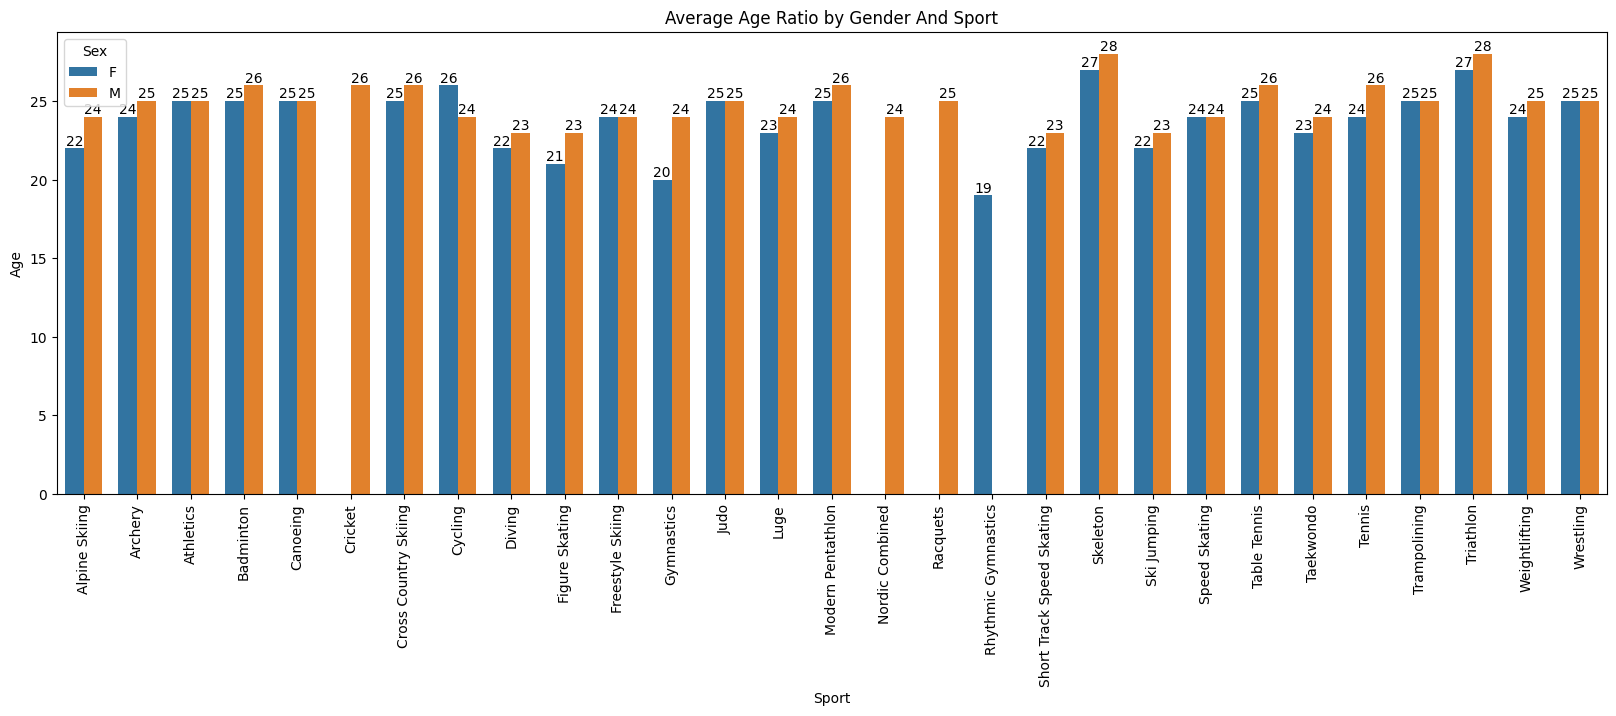

In [33]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=age_mean['Sport'], y=age_mean['Age'], hue=age_mean['Sex'], width=0.7)

for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i])

ax.set_title('Average Age Ratio by Gender And Sport')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

plt.show()


In [35]:
wg_mean = round(df.groupby(['Sport','Sex'])['Weight'].mean()).reset_index()
wg_mean
hg_mean = round(df.groupby(['Sport','Sex'])['Height'].mean()).reset_index()
wg_mean

,Sport,Sex,Weight
0,Alpine Skiing,F,66.0
1,Alpine Skiing,M,78.0
2,Archery,F,64.0
3,Archery,M,76.0
4,Athletics,F,61.0
5,Athletics,M,72.0
6,Badminton,F,63.0
7,Badminton,M,74.0
8,Canoeing,F,66.0
9,Canoeing,M,79.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\2054968333.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


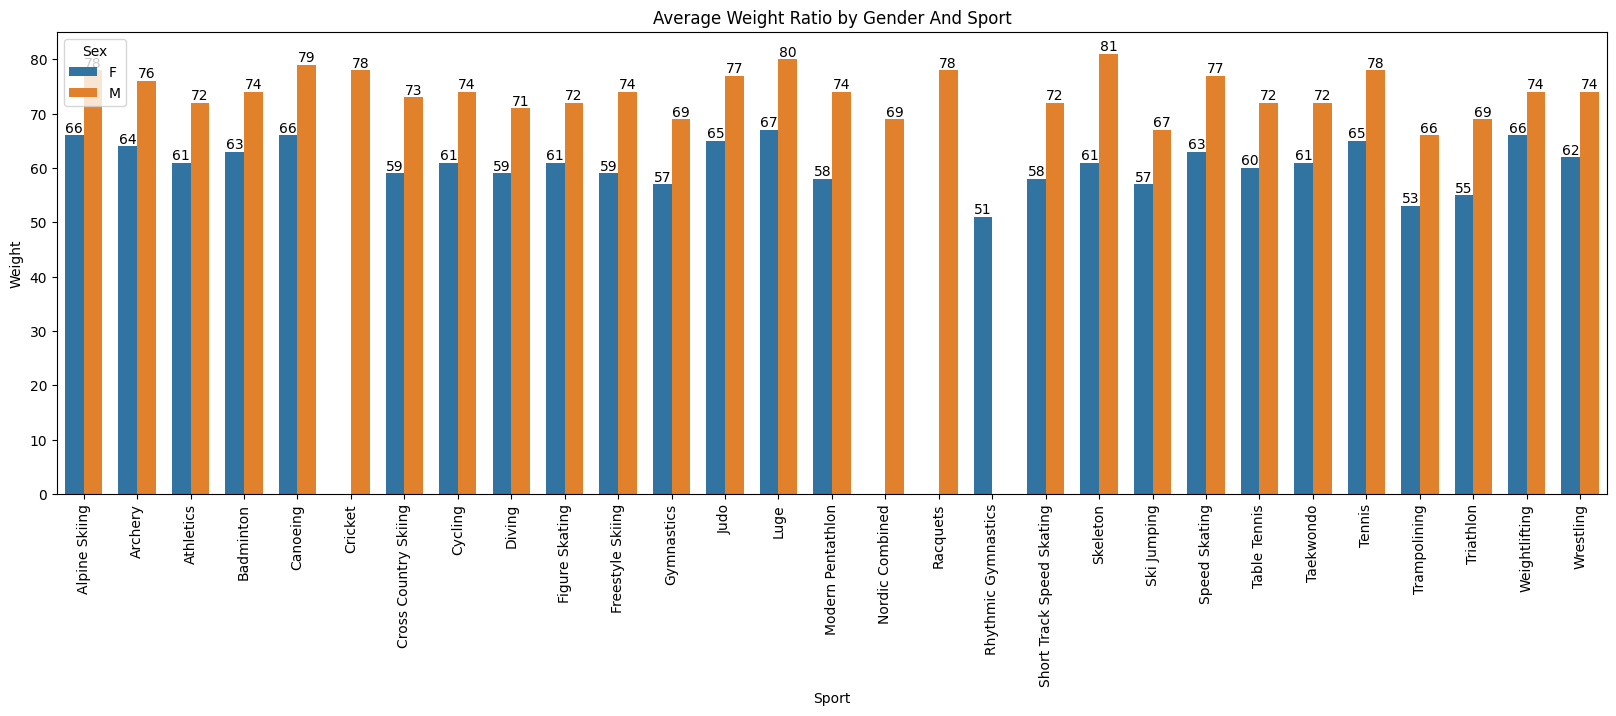

In [37]:
plt.figure(figsize = (20,6))

ax = sns.barplot(x=wg_mean['Sport'],y = wg_mean['Weight'],hue = wg_mean['Sex'],width = 0.7)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Weight Ratio by Gender And Sport')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\365776416.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


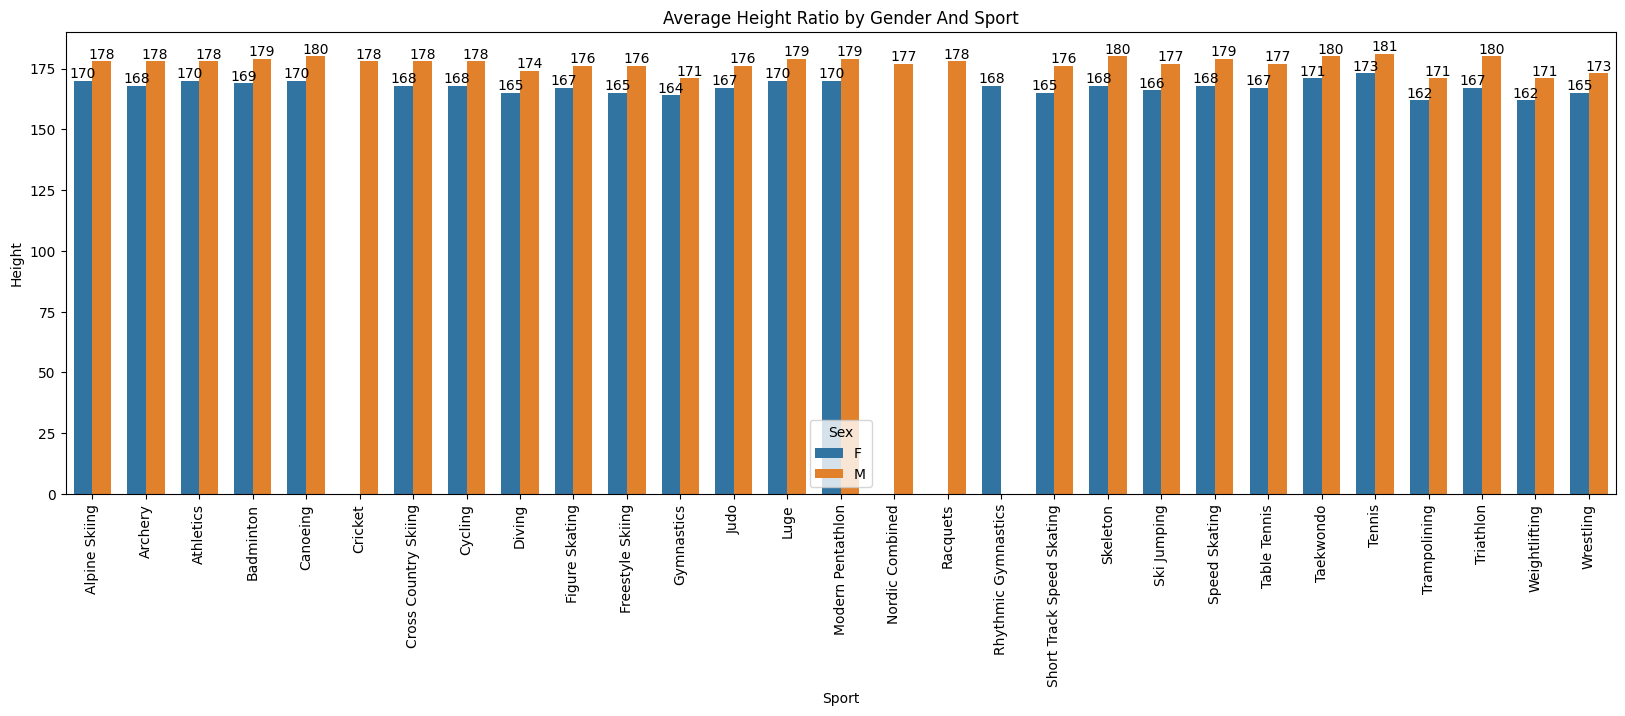

In [38]:
plt.figure(figsize = (20,6))

ax = sns.barplot(x=hg_mean['Sport'],y = hg_mean['Height'],hue = hg_mean['Sex'],width = 0.7)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Height Ratio by Gender And Sport')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.show()

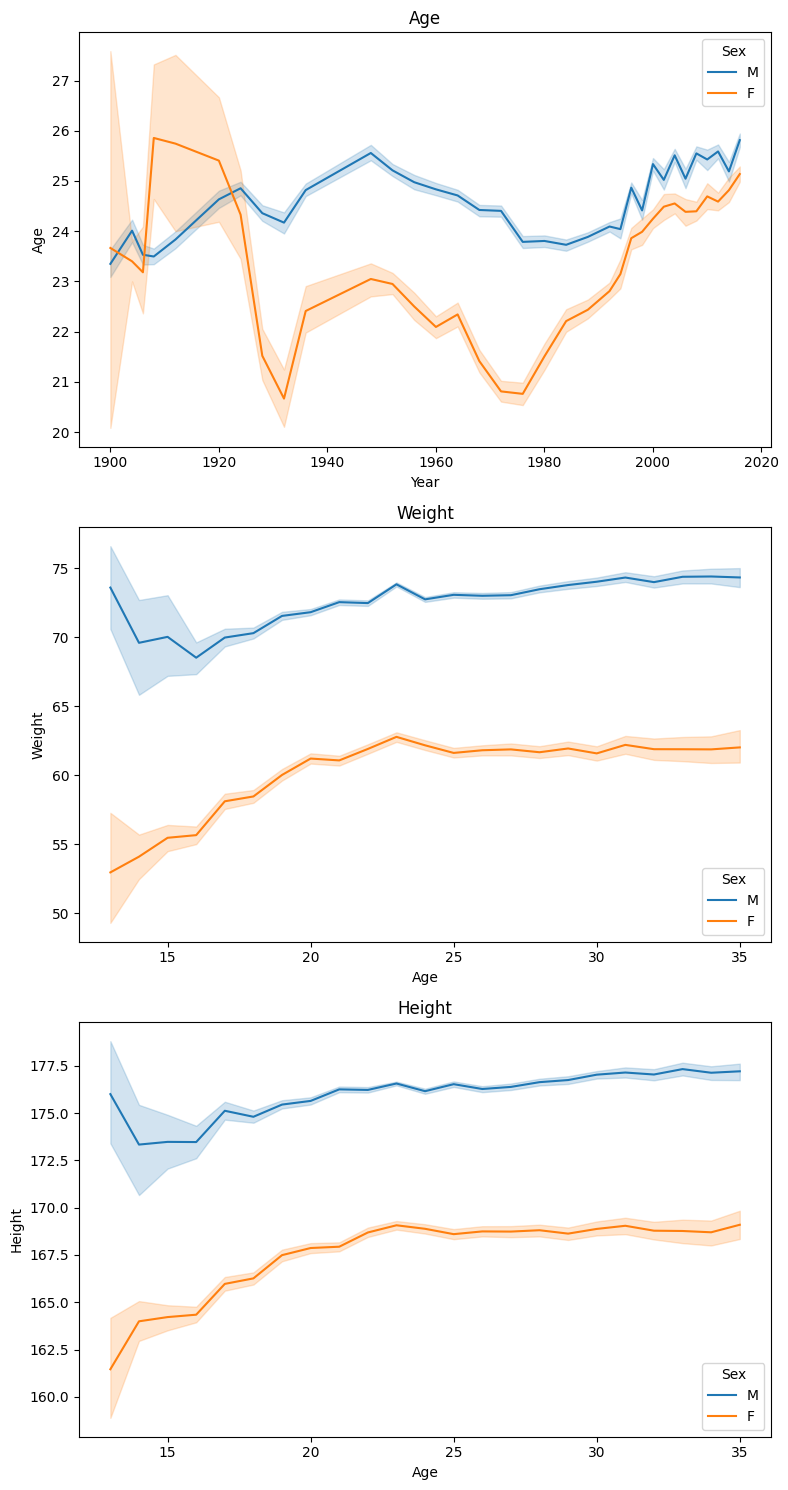

In [39]:
plt.figure(figsize = (8,15))
plt.subplot(3,1,1)
ax = sns.lineplot(x = df['Year'],y = df['Age'],hue = df['Sex'])
ax.set_title('Age')
plt.subplot(3,1,2)
ax = sns.lineplot(y = df['Weight'],x = df['Age'],hue = df['Sex'])
ax.set_title('Weight')
plt.subplot(3,1,3)
ax = sns.lineplot(y = df['Height'],x = df['Age'],hue = df['Sex'])
ax.set_title('Height')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\6287823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\6287823.py:3: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))


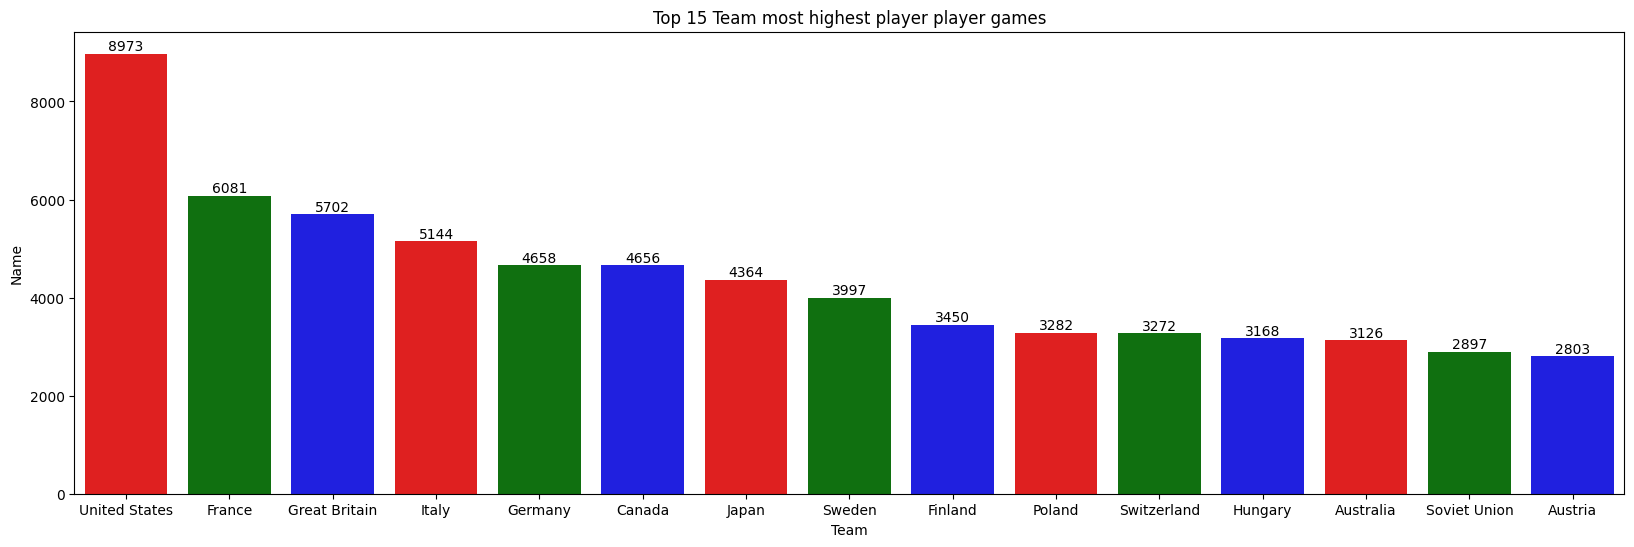

In [40]:
plt.figure(figsize = (20,6))
team_p =   df.groupby(['Team'])['Name'].count().reset_index().sort_values(by = 'Name',ascending = False).head(15)
ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
for i in range(team_p.Name.nunique()):
    ax.bar_label(ax.containers[i])
plt.title('Top 15 Team most highest player player games')
plt.show()

<Axes: xlabel='Year', ylabel='Name'>

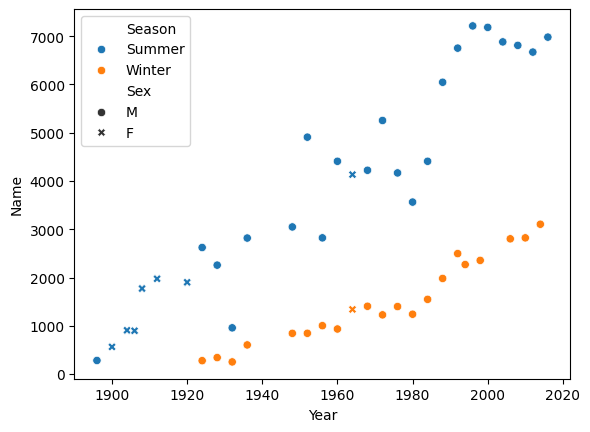

In [41]:
d = df1.groupby(['Year','Season'])['Name'].count().reset_index()
sns.scatterplot(x =d['Year'],y = d['Name'],hue = d['Season'],style = df['Sex'])